<a href="https://colab.research.google.com/github/AbdullahAlshamrani0/IDS/blob/main/HW4/Problem1R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R Language

In [1]:
# Libraries
if (!require("tidyverse")) install.packages("tidyverse")


Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# installing the dataset

url <- "https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv"
data <- read.csv(url, header = TRUE)

                  
                   Female Male
  ?                   377  452
  Federal-gov         149  305
  Local-gov           377  592
  Never-worked          1    4
  Private            3574 6707
  Self-emp-inc         54  444
  Self-emp-not-inc    178  992
  State-gov           201  385
  Without-pay           1    4


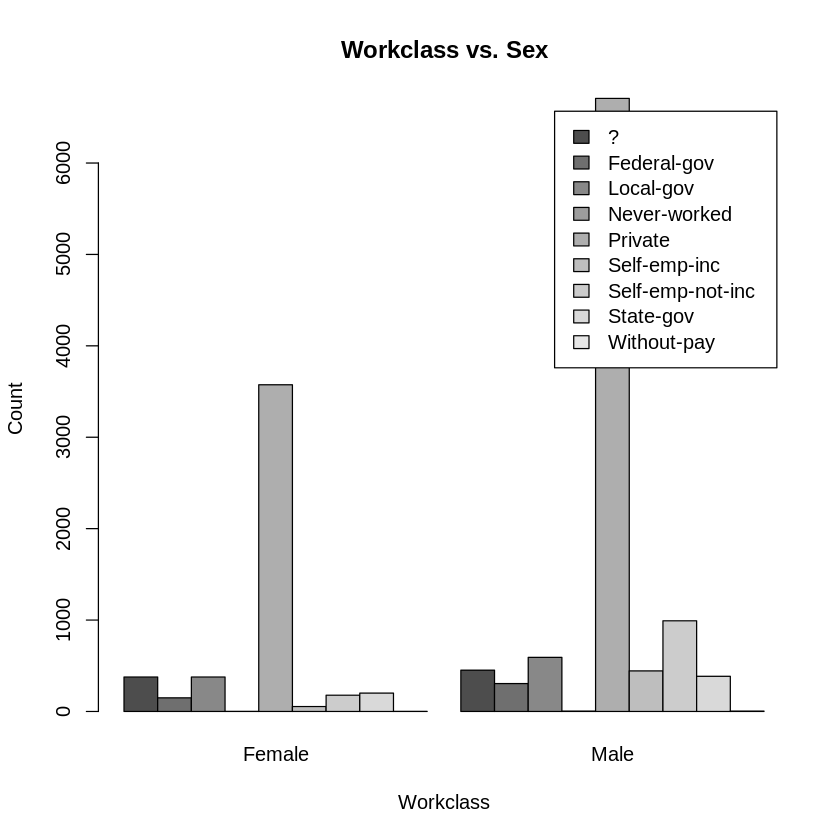

In [3]:
# Create a contingency table of workclass and sex, and plot it.
workclass_sex_contingency <- table(data$workclass, data$sex)
print(workclass_sex_contingency)
barplot(workclass_sex_contingency, beside = TRUE, legend = rownames(workclass_sex_contingency),
        main = "Workclass vs. Sex", xlab = "Workclass", ylab = "Count")



        
         Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent
  Female     1219                 7                761                    95
  Male        795                 4               6010                   104
        
         Never-married Separated Widowed
  Female          2160       290     380
  Male            2717       182      73


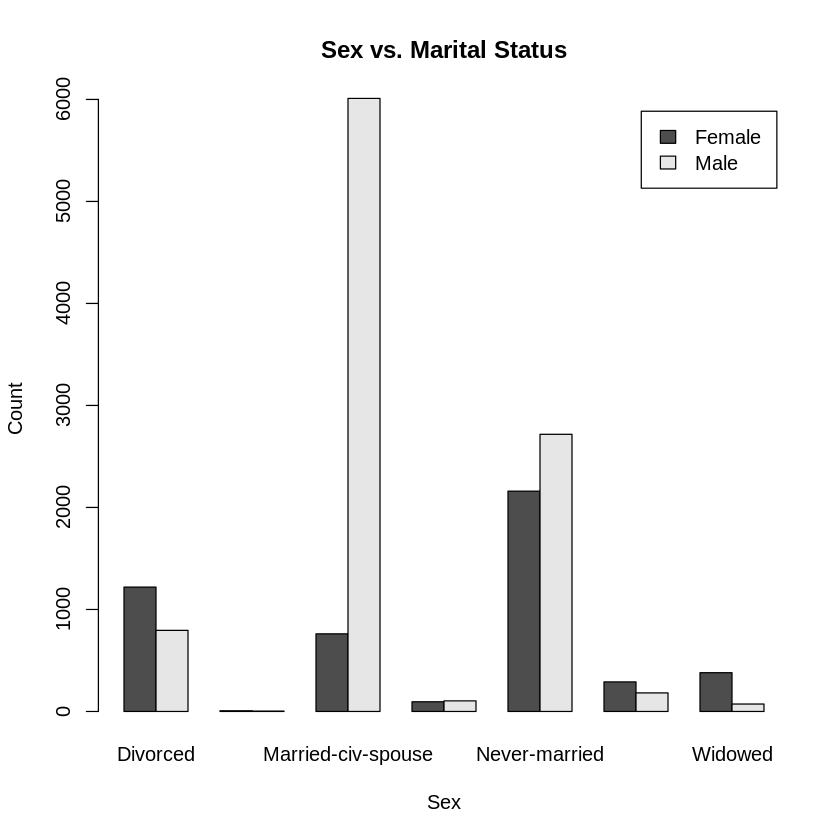

In [4]:
#Create a contingency table of sex and marital status, and plot it.
sex_marital_contingency <- table(data$sex, data$marital)
print(sex_marital_contingency)
barplot(sex_marital_contingency, beside = TRUE, legend = rownames(sex_marital_contingency),
        main = "Sex vs. Marital Status", xlab = "Sex", ylab = "Count")



In [11]:
#Create a new data frame, adultOver40, for those whose age > 40.
over40 <- data[data$age > 40, ]

In [13]:
#Recreate the contingency table of sex and marital status for adultOver40.
sex_marital_contingency_over40 <- table(over40$sex, over40$marital)
print(sex_marital_contingency_over40)



        
         Divorced Married-civ-spouse Married-spouse-absent Never-married
  Female      720                305                    38           256
  Male        448               3383                    47           315
        
         Separated Widowed
  Female       133     354
  Male          74      71


In [10]:
#Determine whether any outliers exist for the education field.
education_outliers <- data[data$education %in% c(" ?", ""), ]
cat("Outliers in education: ", nrow(education_outliers), "\n")


Outliers in education:  0 


In [14]:
# Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?
mean_age <- mean(data$age)
std_age <- sd(data$age)
data$standardized_age <- (data$age - mean_age) / std_age
z_score_threshold <- 3
age_outliers <- data[abs(data$standardized_age) > z_score_threshold, ]
cat("Number of age outliers: ", nrow(age_outliers), "\n")
cat("Most extreme age outlier:\n")
print(age_outliers[which.max(abs(age_outliers$standardized_age)), c("age", "standardized_age")])



Number of age outliers:  60 
Most extreme age outlier:
    age standardized_age
100  90         3.751227


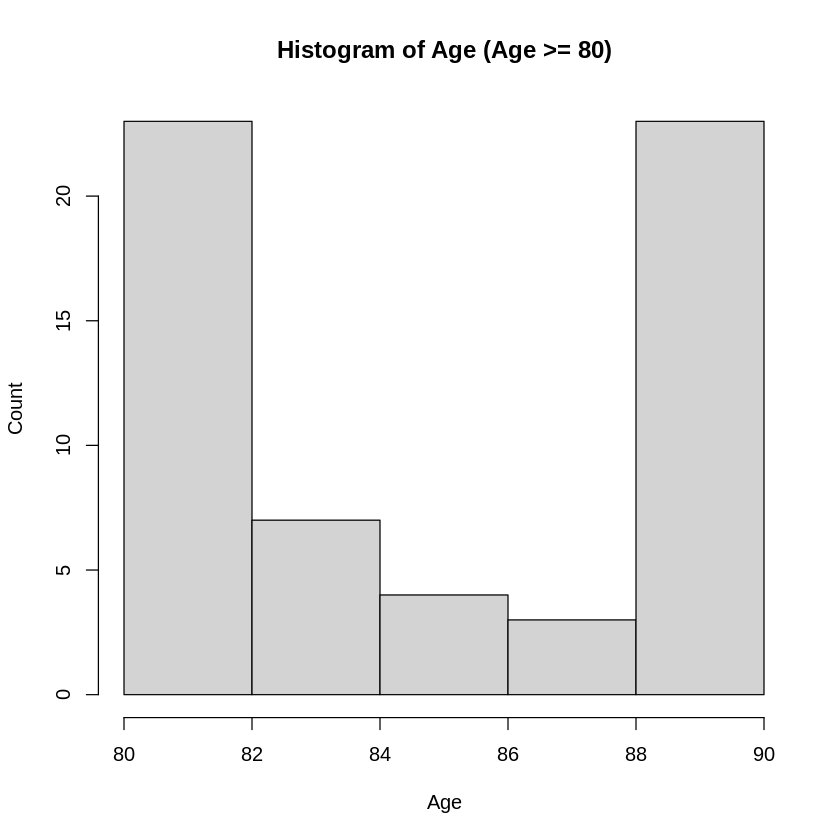

In [15]:
# Select and construct a histogram for age >= 80
over_80 <- data[data$age >= 80, ]
hist(over_80$age, main = "Histogram of Age (Age >= 80)", xlab = "Age", ylab = "Count")


#####more 90'age' people live? but less from 80 to 88?

#Summarize your findings.


Summary:
for the first part of this code: Workclass and sex contingency table plot. In ploting this contingency table we are looking for the distbution of worckclass and sex on the adult_training dataset we have. it shows clearly that more man and women are contributing to the 'Private' class work. and in the catagory private in worckclasses that male are more than female while both genders are contibuting more to the 'private' workclass.
for the second part (sex, marital) status when ploting them I can notice that there are a big range in the Married-civ-spouse for male. and also big range for never-married . where it is totally average numbers for females.
Marriage Status for Older Adults: We then examined how marital status differs between older men and women. This can help us see if older people are more likely to be married or single.
EDUCATION: I found that Education outliers are 0.
Then a histogram for poople who are 80 and older, I found that around 25 is age>90, which is more then people age<90 to 80>.  

#NOTE

When doing the contingency table for the sex, marital-status. it did not identify 'data$$marital-status' and it was giving error message that it does not know what is 'status' object I tried to format the var to data$'marital status'
but I still get error message.

I solved it by just putting the marital word with out -status and it was solved.